In [2]:
import pandas as pd 
import numpy as np
import os
import pyprind
import matplotlib.pyplot as plt
import re
import itertools
import datetime
import csv
import nltk
from nltk.corpus import stopwords

In [3]:
dataframe = pd.read_csv('preprocess_data_analysis.csv')
dataframe.head()

,Unnamed: 0.1,Unnamed: 0,_id,text,task_1,task_2,text_clean
0,0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,made amp amp onli abl start make money sustain...
1,1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technic still turn back clock dick head
2,2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,govt stop think world media liber gang ani opt...
3,3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,soldier japan dick head
4,4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,would better ask think sleazi shitbag lmao


In [4]:
def remove_no(text):
    result = re.sub(r"[0-9]+", "", text)
    result = re.sub(r"[0-9]+", "", text)
    return result

In [5]:
dataframe.iloc[408]['text_clean']

'1 samuel 16 20 jess took donkey load bread contain wine young goat sent saul son david'

In [6]:
len(dataframe)

3843

In [7]:
len(dataframe[dataframe['task_1']=='HOF']),len(dataframe[dataframe['task_1']=='NOT'])

(2501, 1342)

In [8]:
len(dataframe[dataframe['task_1']=='HOF'])/len(dataframe),len(dataframe[dataframe['task_1']=='NOT'])/len(dataframe)

(0.6507936507936508, 0.3492063492063492)

In [9]:
len(dataframe[dataframe['task_2']=='HATE'])/len(dataframe),len(dataframe[dataframe['task_2']=='OFFN'])/len(dataframe),len(dataframe[dataframe['task_2']=='PRFN'])/len(dataframe),len(dataframe[dataframe['task_2']=='NONE'])/len(dataframe)

(0.17772573510278428,
 0.1618527192297684,
 0.3112151964610981,
 0.3492063492063492)

In [10]:
len(dataframe[dataframe['task_2']=='HATE']),len(dataframe[dataframe['task_2']=='OFFN']),len(dataframe[dataframe['task_2']=='PRFN']),len(dataframe[dataframe['task_2']=='NONE'])

(683, 622, 1196, 1342)

In [11]:
test_df = pd.read_csv('preprocess_test_data.csv')
len(test_df)

1281

Text(0, 0.5, 'Sentiment')

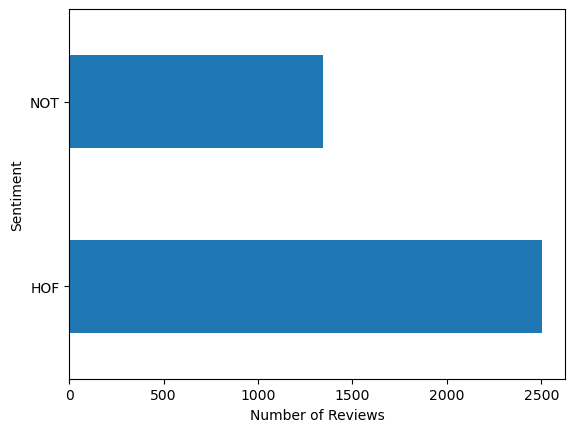

In [12]:
ax = dataframe['task_1'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Sentiment')

Text(0, 0.5, 'Sentiment')

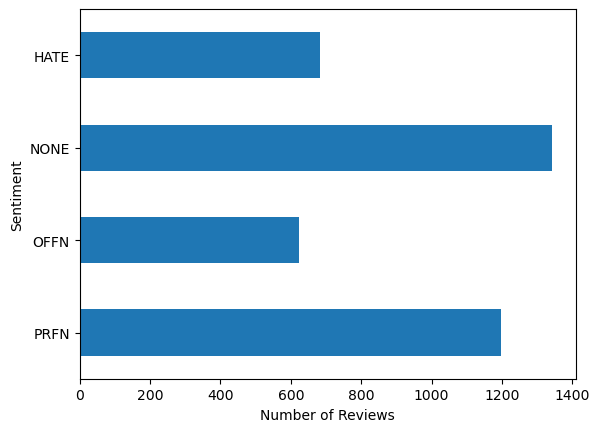

In [13]:
ax = dataframe['task_2'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Sentiment')

a: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


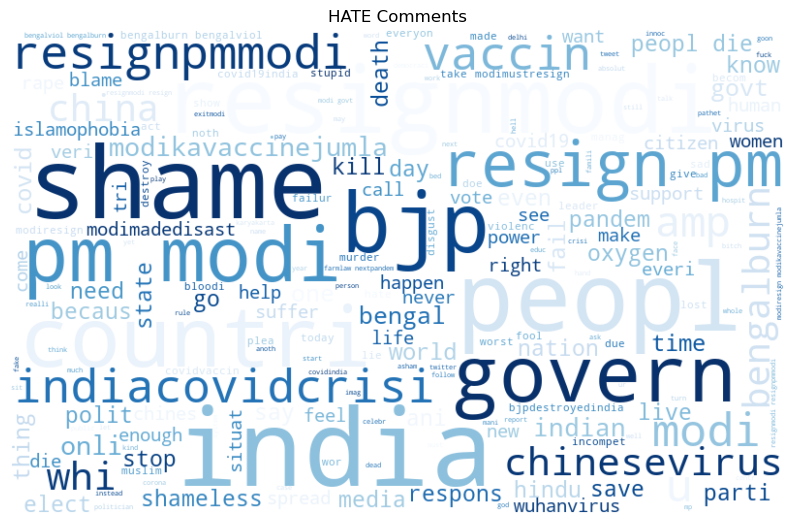

In [14]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['text_clean'][dataframe['task_2'] == 'HATE']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Blues',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("HATE Comments")
plt.axis('off') 
plt.show()

a: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


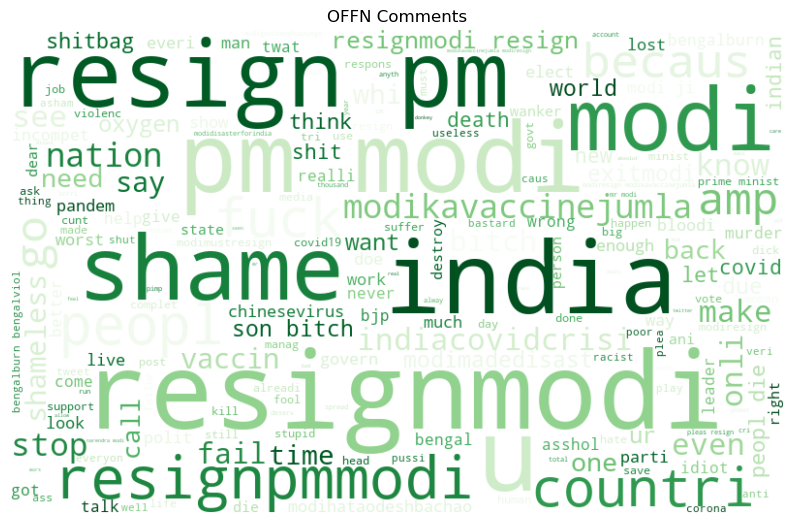

In [15]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['text_clean'][dataframe['task_2'] == 'OFFN']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Greens',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("OFFN Comments")
plt.axis('off') 
plt.show()

a: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


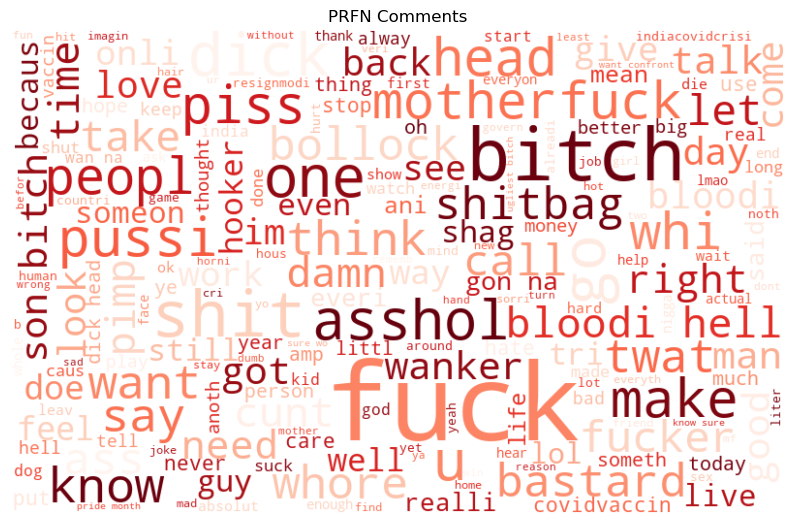

In [16]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['text_clean'][dataframe['task_2'] == 'PRFN']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Reds',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("PRFN Comments")
plt.axis('off') 
plt.show()

a: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


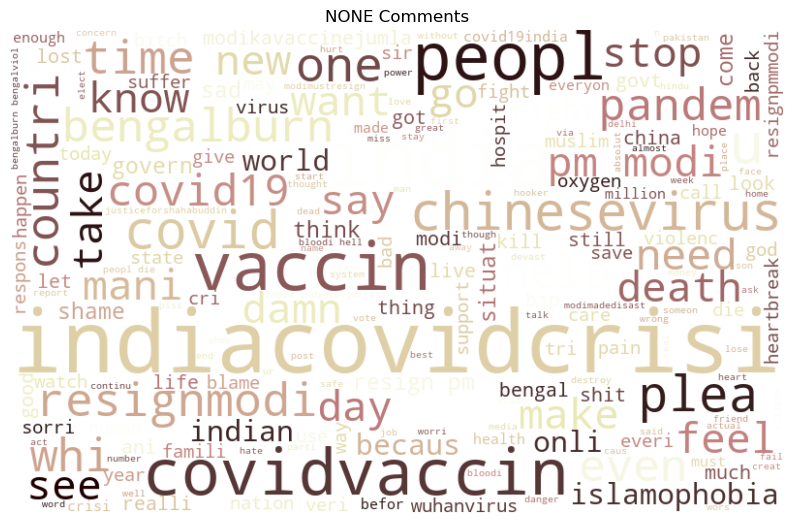

In [17]:
from wordcloud import WordCloud
normal_words =' '.join([str(text) for text in dataframe['text_clean'][dataframe['task_2'] == 'NONE']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='pink',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("NONE Comments")
plt.axis('off') 
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

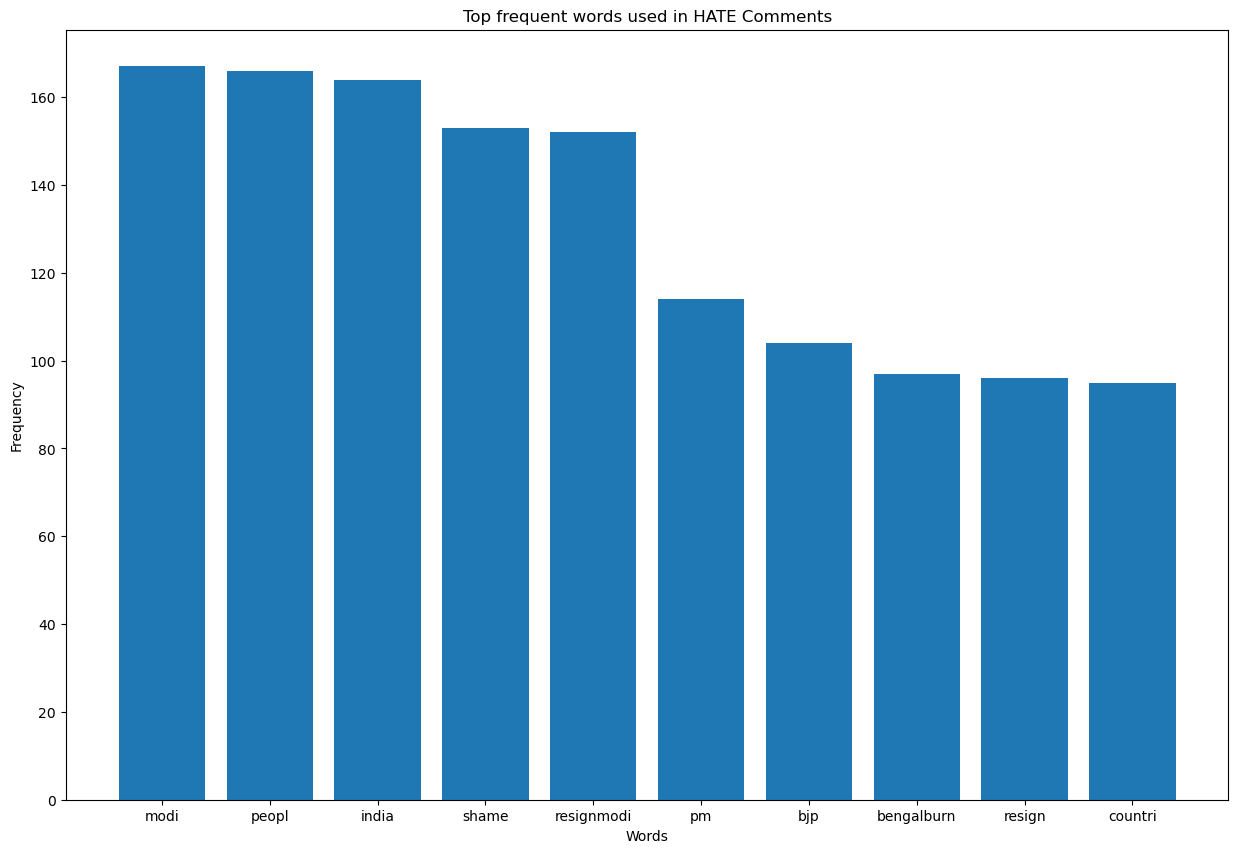

In [19]:
pos_bow = bow_vectorizer.fit_transform(dataframe['text_clean'][dataframe['task_2'] == 'HATE'])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names_out()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:10]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(15,10))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in HATE Comments')
plt.show()

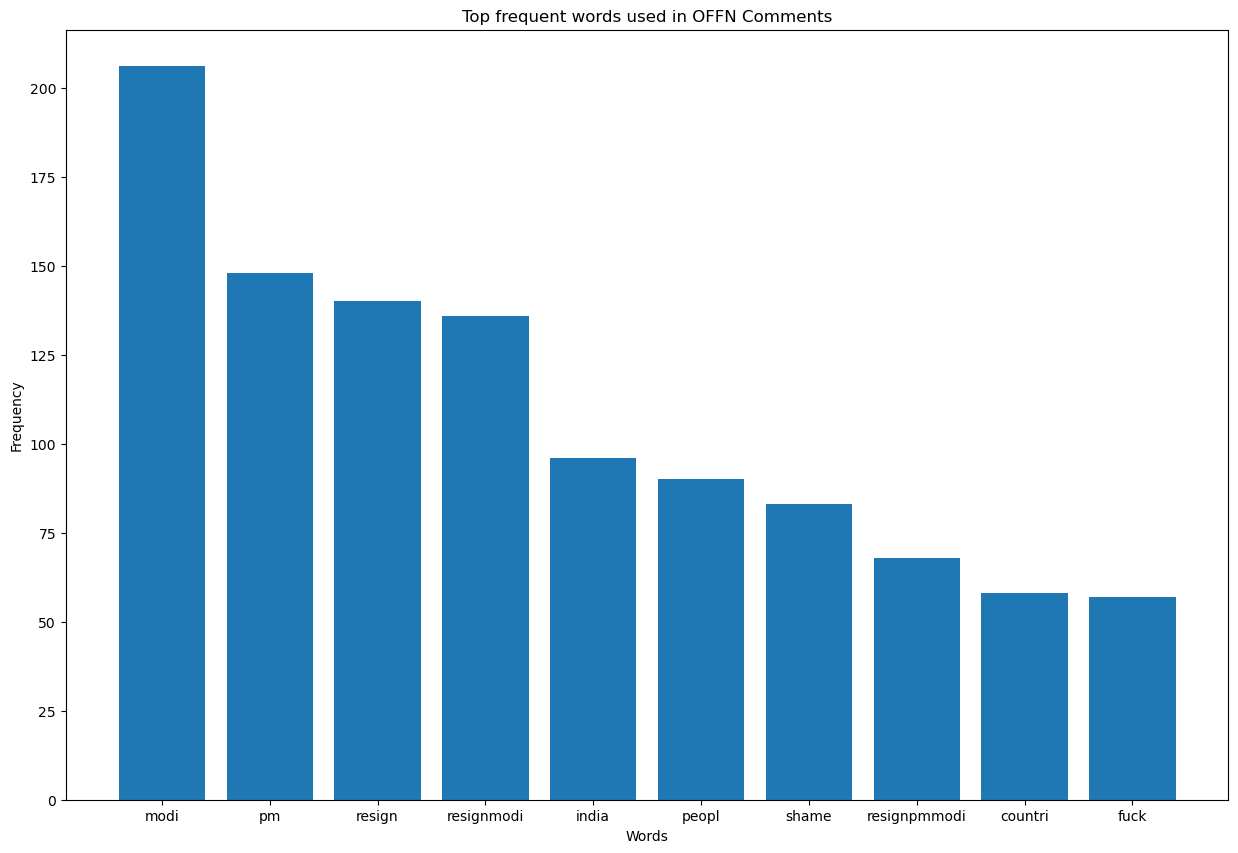

In [20]:
pos_bow = bow_vectorizer.fit_transform(dataframe['text_clean'][dataframe['task_2'] == 'OFFN'])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names_out()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:10]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(15,10))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in OFFN Comments')
plt.show()

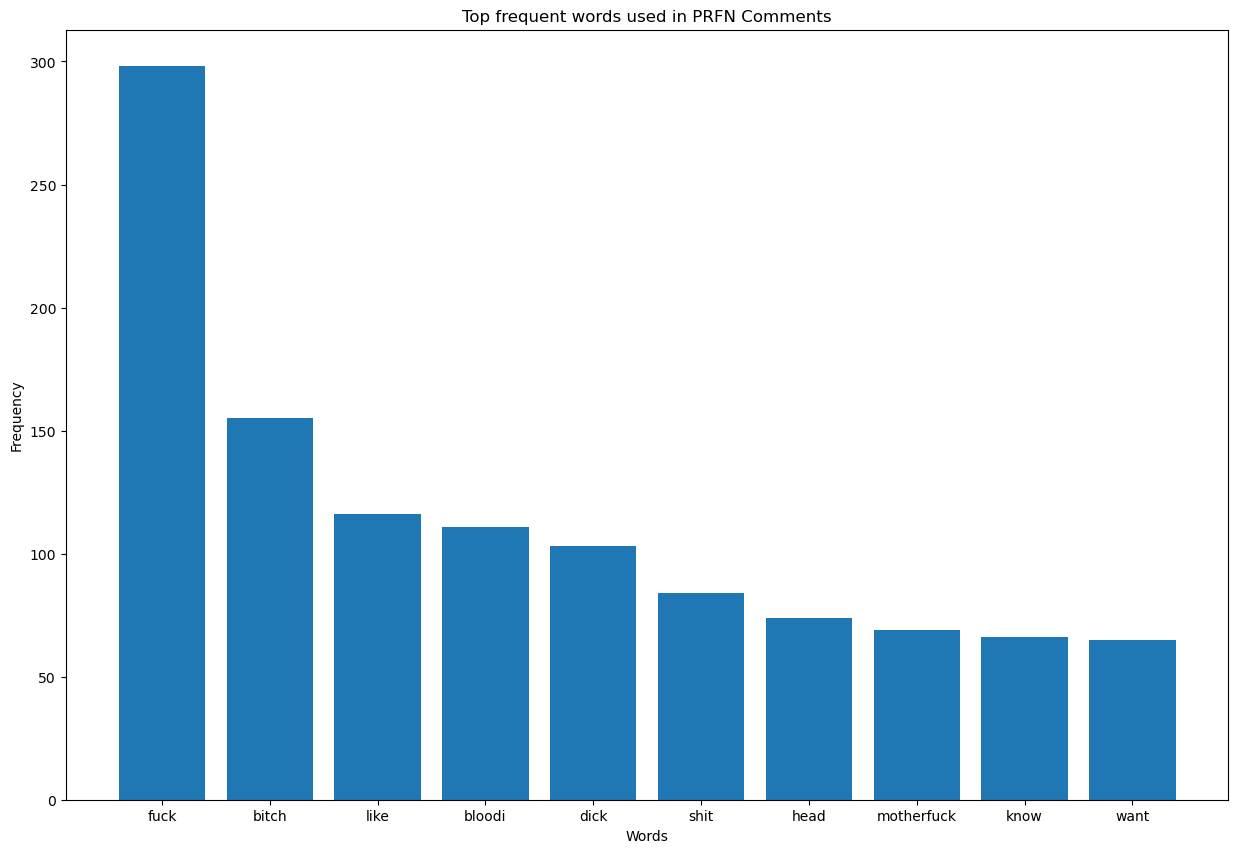

In [21]:
pos_bow = bow_vectorizer.fit_transform(dataframe['text_clean'][dataframe['task_2'] == 'PRFN'])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names_out()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:10]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(15,10))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in PRFN Comments')
plt.show()

In [22]:
nltk.download('stopwords')
stopwordsList = stopwords.words('english')
stopwordsList.append('br')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\8888\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Total word count
dataframe['word_count'] = dataframe['text_clean'].apply(lambda x: len(str(x).split()))

# Unique_word_count
dataframe['unique_word_count'] = dataframe['text_clean'].apply(lambda x: len(set(str(x).split())))

# Stop_Word_count
dataframe['stop_word_count'] = dataframe['text_clean'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwordsList]))

In [24]:
import string
# Mean_word_length
dataframe['mean_word_length'] = dataframe['text_clean'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Char_count
dataframe['char_count'] = dataframe['text_clean'].apply(lambda x: len(str(x)))

In [25]:
dataframe.head()

,Unnamed: 0.1,Unnamed: 0,_id,text,task_1,task_2,text_clean,word_count,unique_word_count,stop_word_count,mean_word_length,char_count
0,0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,made amp amp onli abl start make money sustain...,20,18,0,4.350000,106
1,1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technic still turn back clock dick head,7,7,0,4.714286,39
2,2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,govt stop think world media liber gang ani opt...,22,21,0,5.363636,139
3,3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,soldier japan dick head,4,4,0,5.000000,23
4,4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,would better ask think sleazi shitbag lmao,7,7,0,5.142857,42


C:\Users\8888\AppData\Local\Temp\ipykernel_15876\3847811976.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.loc[hate][feature], label='HATE', ax=axes[i], color='blue')
C:\Users\8888\AppData\Local\Temp\ipykernel_15876\3847811976.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

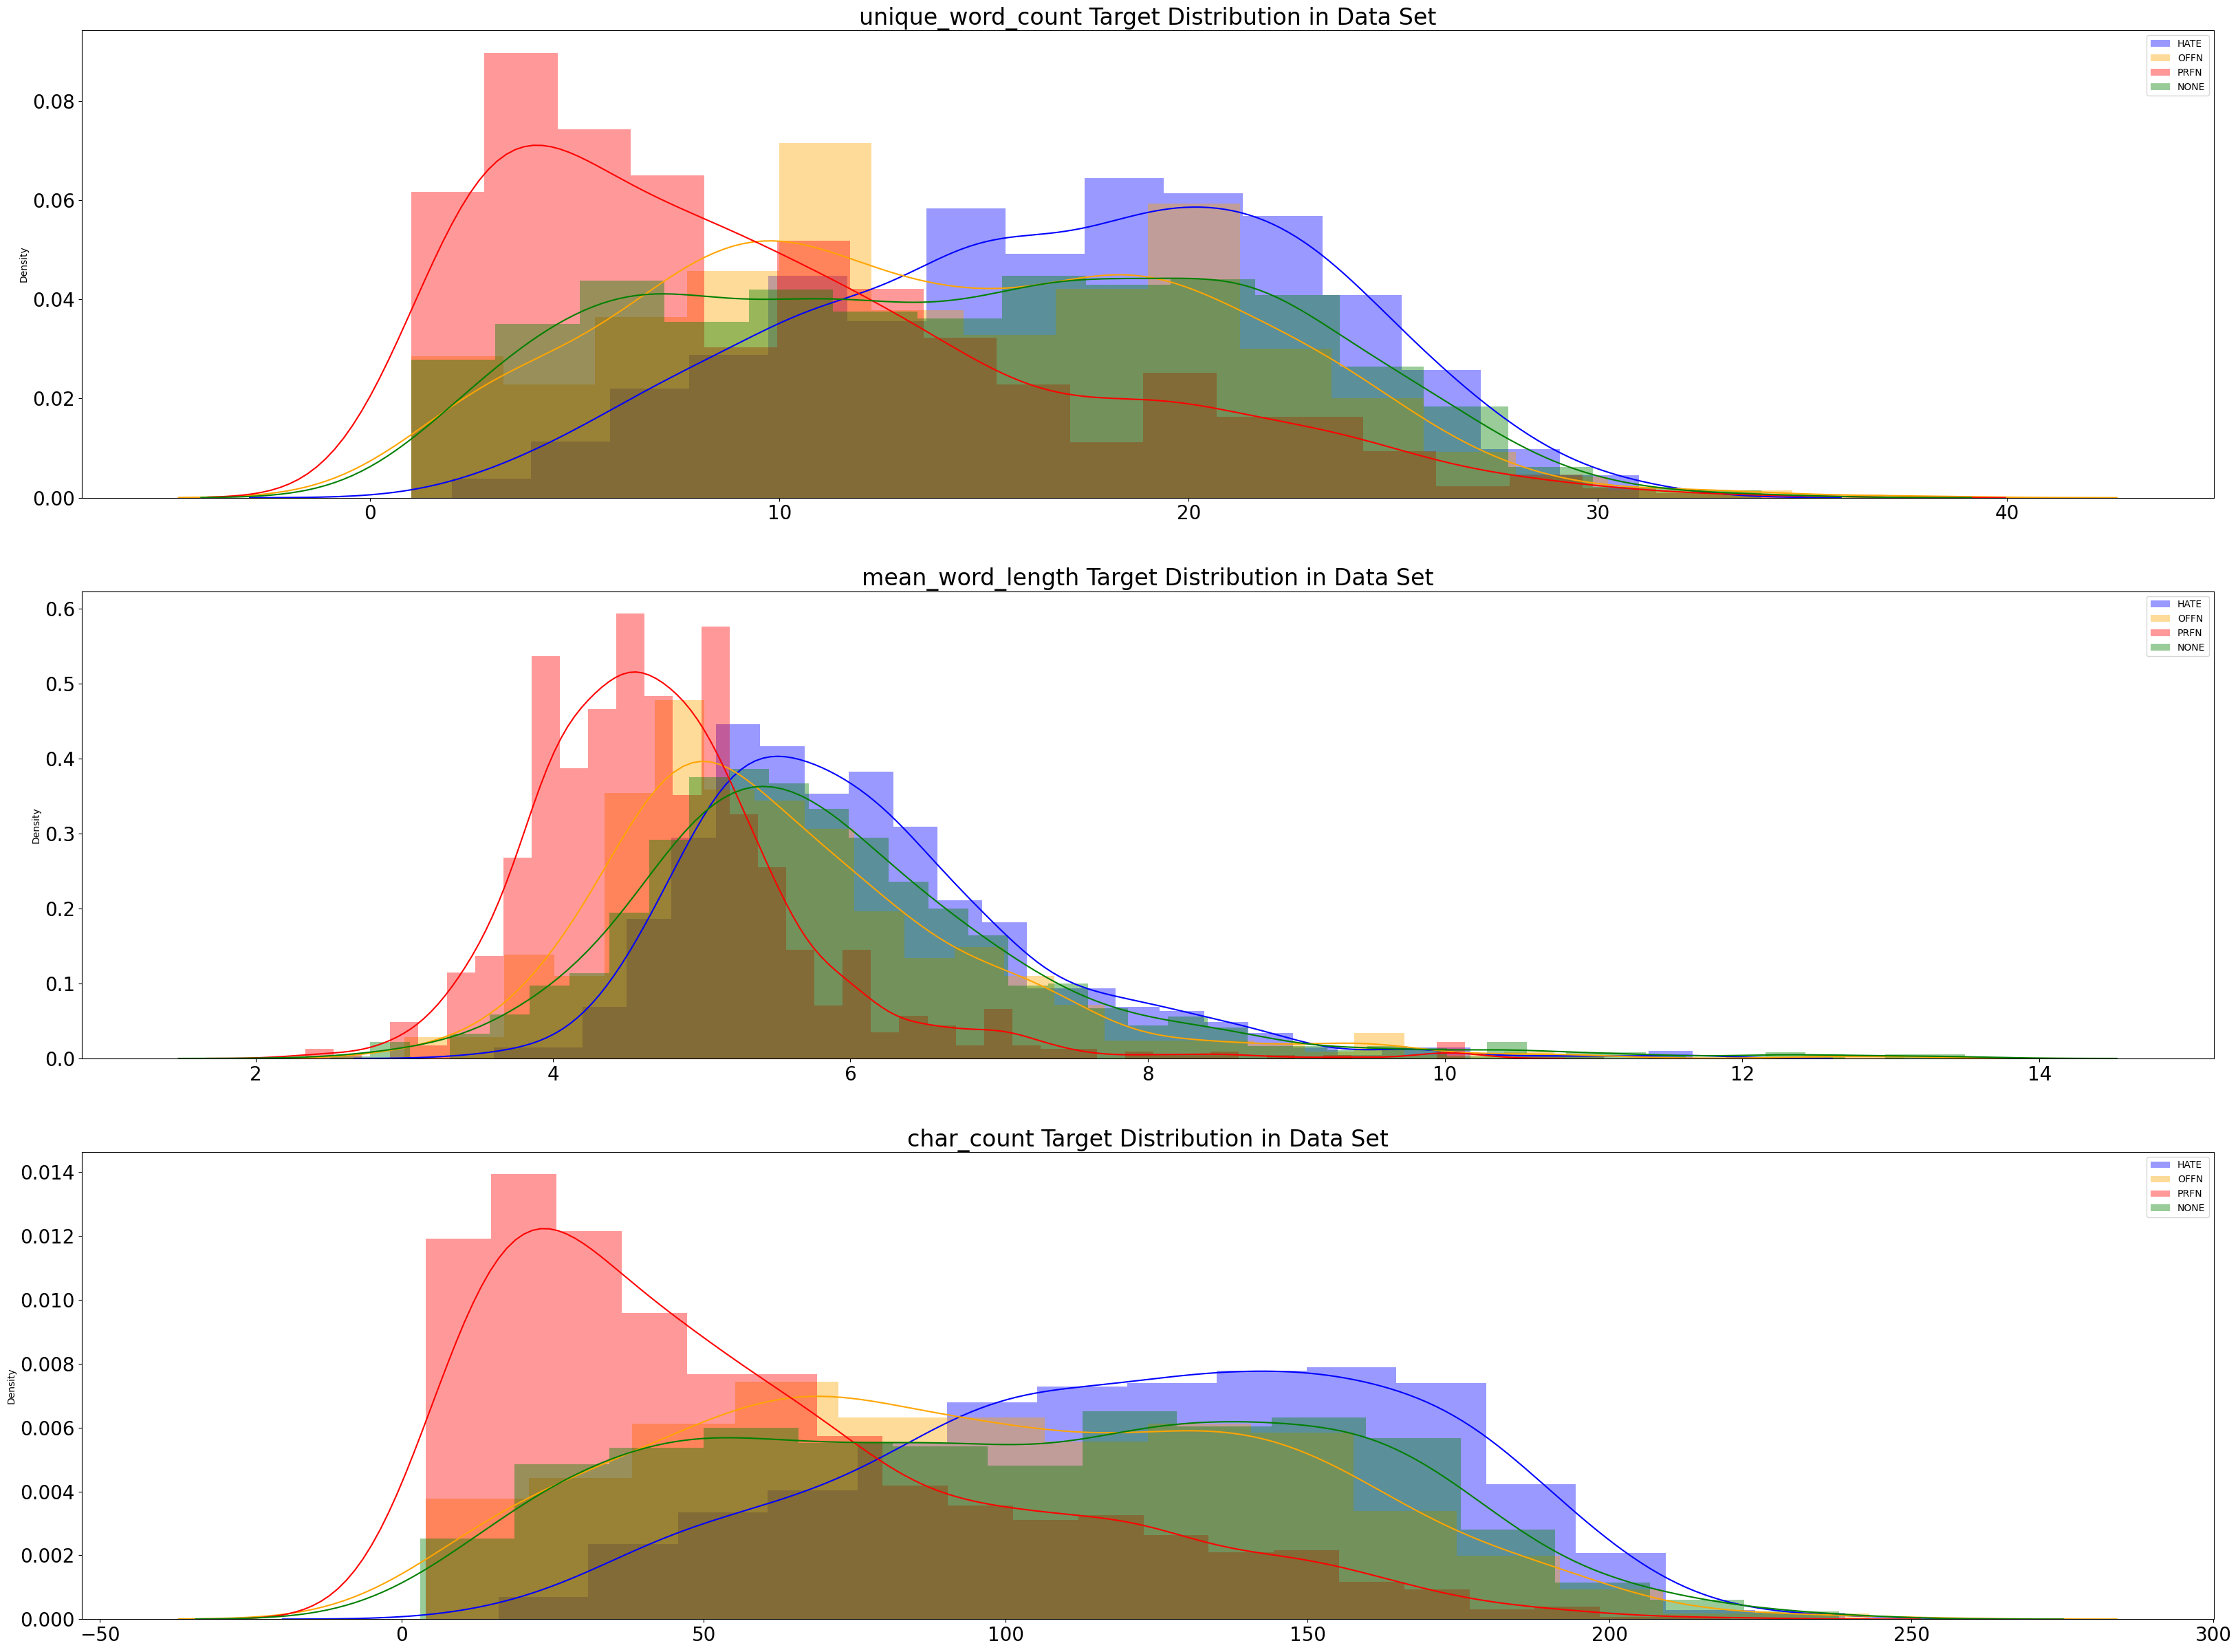

In [27]:
import seaborn as sns
METAFEATURES = ['unique_word_count','mean_word_length','char_count']
hate= dataframe['task_2'] == 'HATE'
offn = dataframe['task_2'] == 'OFFN'
prfn = dataframe['task_2'] == 'PRFN'
none = dataframe['task_2'] == 'NONE'

fig, axes = plt.subplots(nrows=len(METAFEATURES), figsize=(40, 30))
for i, feature in enumerate(METAFEATURES):
    sns.distplot(dataframe.loc[hate][feature], label='HATE', ax=axes[i], color='blue')
    sns.distplot(dataframe.loc[offn][feature], label='OFFN', ax=axes[i], color='orange')
    sns.distplot(dataframe.loc[prfn][feature], label='PRFN', ax=axes[i], color='red')
    sns.distplot(dataframe.loc[none][feature], label='NONE', ax=axes[i], color='green')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
    axes[i].legend()
    axes[i].set_title(f'{feature} Target Distribution in Data Set', fontsize=24)

plt.show()